In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import sys
from bs4 import BeautifulSoup
import urllib.request
import json
import datetime
etf = 'IWM'

In [2]:
def etf_scraper(etf, pages, stocks_per_page):
    holding_information = {}
    for i in range(pages):
        url = 'https://www.etfchannel.com/lists/?a=stockholdings&issuer=&symbol=' + etf + '&sortby=&reverse=&rpp=20&start=' + str(i)
        #print(url)
        headers = {
        'User-Agent':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:83.0) Gecko/20100101 Firefox/83.0',
            'Cookie': '__utma=40499190.721819472.1606866186.1606866186.1606866186.1;__utmb=40499190.12.10.1606866186;__utmc=40499190;__utmz=40499190.1606866186.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not provided);_ntv_uid=b8939a36-e653-4849-8f4b-ccb88f44fe39;mnet_session_depth=4|1606867830728;__qca=P0-1139184520-1606866186100;bfp_sn_rf_2a9d14d67e59728e1b5b2c86cb4ac6c4=https://www.google.com/;bfp_sn_rt_2a9d14d67e59728e1b5b2c86cb4ac6c4=1606866186505;aasd=4|1606867831044;__aaxsc=2;__gads=ID=97fa76…=ee267869-1098-4833-a63b-a354b70e4f54;cto_bundle=e2Cail9GajZYRDQ1WDFTJTJCR1pOcTZYa3h6WFJzZSUyQlolMkJwdEZzbWNSOGNEVzBwb2JZUWJuT0RDR1hkZzFzaFNweDFzQUFjeks0WHZ6ZmJMJTJCNCUyQjc1dk1hUE9YRnM5WSUyQjBnYjNXODhMZGFDRFZ1ZGdWTXZkMWlrcDAzTjI5a002R0hkd2xKcSUyQldGR2o1OXVxREdYJTJCZmc0OW14UktBJTNEJTNE;_unifiedId={"TDID":"1545df2b-01dd-4787-ae7c-9e18089d4764","TDID_LOOKUP":"FALSE","TDID_CREATED_AT":"2020-12-01T23:43:41"};rtk_p={};slogin=1606866868;slogin=1606866868;__utmt=1'
        }
        #print(json.dumps(headers))
        req = urllib.request.Request(url)
        data = ''
        req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:83.0) Gecko/20100101 Firefox/83.0')
        req.add_header('Cookie', '_unifiedId={\"TDID\":\"1545df2b-01dd-4787-ae7c-9e18089d4764\","TDID_LOOKUP":"FALSE","TDID_CREATED_AT":"2020-12-01T23:43:41"};rtk_p={};slogin=1606866868;slogin=1606866868;__utmt=1')
        with urllib.request.urlopen(req) as f:
            data = (f.read().decode('utf-8'))
            #print(data)
            soup = BeautifulSoup(data, "html.parser")
            children = ([str(child) for child in soup.children])
            cut_text = children[1]
            maximum = stocks_per_page
            for i in range(maximum):
                ticker_index = cut_text.find('/symbol/') + 8
                #print(ticker_index)
                cut_text = cut_text[ticker_index::]
                ticker = cut_text[0:cut_text.find('"')]
                weight_index = cut_text.find('"2">')+4
                weight_index_end = cut_text.find("</font>", weight_index)
                weight = cut_text[weight_index:weight_index_end]
                cut_text = cut_text[weight_index_end::]
                amount_index = cut_text.find('"2">')+4
                amount_index_end = cut_text.find("</font>", amount_index)
                amount = cut_text[amount_index:amount_index_end]
                if(ticker.find("<") != -1):
                    continue
                holding_information[ticker] = [weight, amount]
                #print(ticker, weight, amount)
    return holding_information

In [3]:
scraper_information = etf_scraper(etf, 100, 20)
print(scraper_information)

{'penn': ['0.58%', '$324,944,827'], 'czr': ['0.54%', '$300,237,210'], 'plug': ['0.48%', '$268,201,728'], 'rare': ['0.42%', '$235,531,253'], 'mrtx': ['0.41%', '$228,562,952'], 'dar': ['0.38%', '$212,885,692'], 'run': ['0.38%', '$211,624,957'], 'deck': ['0.35%', '$194,693,562'], 'arwr': ['0.34%', '$187,428,504'], 'chdn': ['0.33%', '$184,906,497'], 'nvax': ['0.32%', '$181,071,502'], 'iivi': ['0.31%', '$173,141,127'], 'lad': ['0.31%', '$174,513,490'], 'rdfn': ['0.31%', '$173,098,097'], 'ntra': ['0.30%', '$164,827,901'], 'rh': ['0.29%', '$162,463,221'], 'bpmc': ['0.28%', '$154,086,235'], 'fate': ['0.28%', '$156,170,264'], 'site': ['0.28%', '$154,782,073'], 'bl': ['0.28%', '$154,747,916'], 'bld': ['0.27%', '$149,807,873'], 'irtc': ['0.27%', '$150,697,189'], 'lhcg': ['0.27%', '$152,608,467'], 'ttek': ['0.26%', '$147,775,252'], 'fold': ['0.26%', '$142,368,654'], 'pfgc': ['0.26%', '$145,359,305'], 'qtwo': ['0.25%', '$141,647,598'], 'lscc': ['0.25%', '$138,281,279'], 'nvro': ['0.25%', '$138,346,

In [4]:
start = datetime.datetime(2020,12,1)
end = datetime.datetime(2020,12,5)

In [101]:
iwm = yf.download(etf,start=start,end=end,progress=False)
iwm_price_change = (round(float(iwm['Close'][-1]),3)-round(float(iwm['Close'][0]),3))/round(float(iwm['Close'][0]),3)
print(iwm_price_change)
print(iwm)

0.016119321291735204
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-01  183.600006  184.220001  181.020004  182.699997  182.699997   
2020-12-02  181.949997  183.479996  180.759995  182.889999  182.889999   
2020-12-03  183.339996  185.179993  182.940002  183.919998  183.919998   
2020-12-04  185.020004  185.979996  185.029999  185.645004  185.645004   

              Volume  
Date                  
2020-12-01  30324300  
2020-12-02  20142800  
2020-12-03  19554300  
2020-12-04   3821876  


In [102]:
def find_outperformers(ticker, other_data, start, end, threshold, outperformers):
    try:
        stock = yf.download(ticker,start=start,end=end,progress=False)
        price_change = (round(float(stock['Close'][-1]),3)-round(float(stock['Close'][0]),3))/round(float(stock['Close'][0]),3)
        if(price_change < threshold):
            return
        avg_volume = sum(stock['Volume'])/len(stock['Volume'])
        outperformers.append([ticker, price_change, avg_volume] + other_data)
        return [ticker, price_change, avg_volume]

    except:
        print('error ', ticker, sys.exc_info()[0])

In [103]:
def display_data(ticker, start, end):
    stock = yf.download(ticker,start=start,end=end,progress=False)
    stock['Close'].plot(subplots=['Volume'], figsize=(30,17))

In [104]:
outperformers = []
for ticker in scraper_information:
    find_outperformers(ticker, scraper_information[ticker], start, end ,iwm_price_change, outperformers)
print(outperformers[0])

error   <class 'ValueError'>
['pfgc', 0.023444347063978972, 831651.0, '0.30%', '$153,885,078']


In [105]:
dict_holder = {}
for i in outperformers:
    i[2] = round(i[2],2)
    dict_holder[i[0]] = i[1::]
    print(i)
iwm_outperformers = pd.DataFrame.from_dict(dict_holder, orient='index', columns=['%change', 'Avg Volume','Weight','InvestmentValue'])

['pfgc', 0.023444347063978972, 831651.0, '0.30%', '$153,885,078']
['ssb', 0.034072785268957434, 233771.5, '0.26%', '$135,356,168']
['bxmt', 0.04540379605507997, 1069451.0, '0.23%', '$118,460,550']
['vac', 0.01751803326954214, 314403.25, '0.22%', '$112,755,337']
['m', 0.09326923076923066, 24456004.25, '0.21%', '$106,389,478']
['arwr', 0.03256704980842922, 570328.75, '0.21%', '$106,293,713']
['deck', 0.05579504632255623, 364187.25, '0.21%', '$109,295,280']
['cit', 0.08398721301947111, 1042239.25, '0.20%', '$104,624,381']
['bco', 0.04914933837429126, 304694.75, '0.20%', '$102,323,193']
['sbra', 0.05630498533724345, 1411721.5, '0.20%', '$102,802,636']
['ubsi', 0.0168896321070235, 313831.0, '0.20%', '$103,451,015']
['vly', 0.021794871794871863, 1312164.25, '0.20%', '$101,595,356']
['dar', 0.02246603970741893, 770446.75, '0.20%', '$104,945,384']
['gbci', 0.023717328170377465, 283485.25, '0.19%', '$96,337,008']
['ffin', 0.017008797653958893, 255381.75, '0.19%', '$99,229,613']
['qtwo', 0.03318

In [106]:
print(len(outperformers))

994


In [107]:
iwm_outperformers = iwm_outperformers.sort_values(by=['%change'])

iwm.head()

In [108]:
iwm_outperformers['%change']

fbiz     0.016154
gtn      0.016156
xone     0.016184
insm     0.016224
matw     0.016224
           ...   
stro     0.331548
ltrpa    0.349153
kos      0.362500
nsco     0.373614
wdr      0.511559
Name: %change, Length: 994, dtype: float64

In [109]:
iwm_outperformers = iwm_outperformers.dropna()

len(iwm_outperformers)

print(len(iwm_outperformers))

In [110]:
len(iwm_outperformers)

994

In [111]:
find_outperformers('abm', scraper_information['abm'], start, end ,iwm_price_change, [])

In [114]:
top_movers = iwm_outperformers.tail(100)

In [115]:
top_movers.tail(100)

%change   Avg Volume Weight InvestmentValue
drh    0.098465   4271489.75  0.09%     $47,279,167
cal    0.098818    455033.25  0.03%     $17,203,970
idt    0.099135    253853.25  0.01%      $2,802,727
nex    0.100000   1400146.00  0.04%     $22,081,824
fro    0.100163   2217610.25  0.06%     $28,851,616
...         ...          ...    ...             ...
stro   0.331548    822112.75  0.01%      $6,907,183
ltrpa  0.349153   1997423.75  0.02%     $11,114,991
kos    0.362500  10043648.75  0.11%     $57,541,070
nsco   0.373614   6893209.25  0.00%      $1,274,468
wdr    0.511559   8310608.25  0.05%     $25,264,290

[100 rows x 4 columns]

In [83]:
new_start = datetime.datetime(2020,11,1)
new_end = datetime.datetime(2020,12,4)

array([<AxesSubplot:xlabel='Date'>], dtype=object)

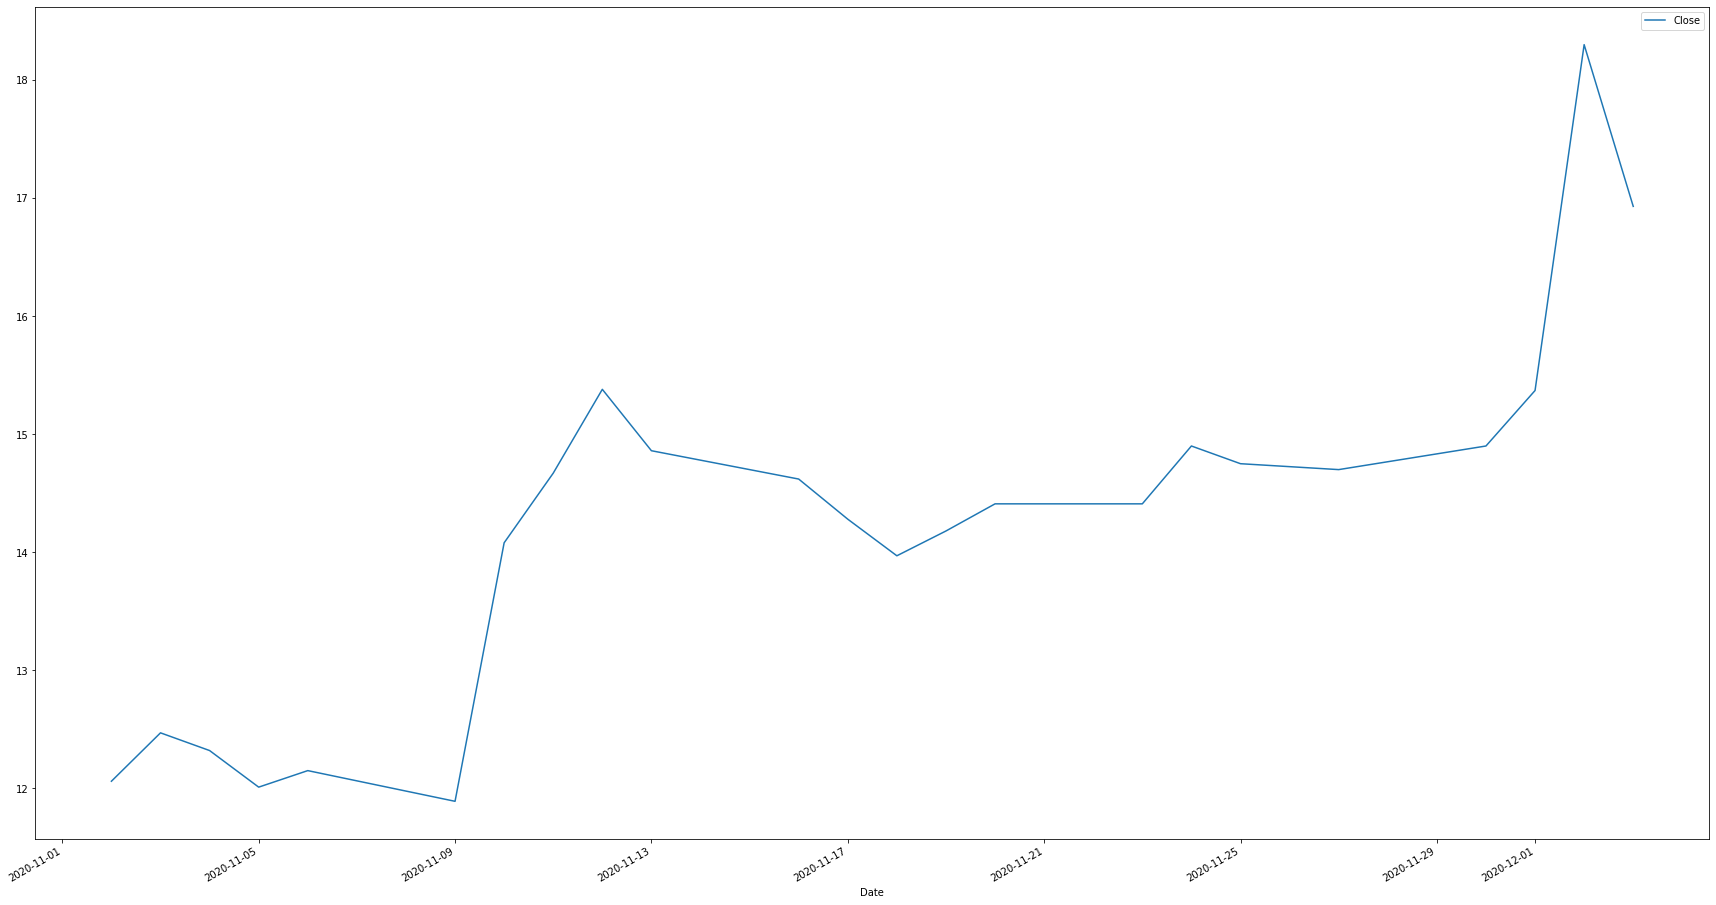

In [84]:
stock = yf.download('plse',start=new_start,end=new_end,progress=False)
stock.plot(y=['Close'], subplots=['Volume'], figsize=(30,17))

In [85]:
stock

Open       High     Low      Close  Adj Close  Volume
Date                                                              
2020-11-02  12.30  12.460000  11.710  12.060000  12.060000   40200
2020-11-03  12.29  12.720000  12.220  12.470000  12.470000   39400
2020-11-04  12.39  12.690000  12.165  12.320000  12.320000   36900
2020-11-05  12.29  12.550000  11.890  12.010000  12.010000   45500
2020-11-06  12.21  12.470000  11.890  12.150000  12.150000   60200
2020-11-09  12.08  12.750000  11.800  11.890000  11.890000   96500
2020-11-10  12.57  14.960000  12.160  14.080000  14.080000  215100
2020-11-11  14.01  14.970000  14.010  14.670000  14.670000  119400
2020-11-12  14.94  15.490000  14.210  15.380000  15.380000  104300
2020-11-13  15.32  15.950000  14.650  14.860000  14.860000   92900
2020-11-16  14.90  15.450000  14.350  14.620000  14.620000   47900
2020-11-17  14.41  14.800000  14.270  14.280000  14.280000   33400
2020-11-18  14.31  14.575000  13.890  13.970000  13.970000   43100
2020-11-19  13.93  14.515000  13.895  14.180000  14.180000   43900
2020-11-20  13.96  14.410000  13.800  14.410000  14.410000   42100
2020-11-23  14.50  15.020000  14.230  14.410000  14.410000   61200
2020-11-24  14.52  14.920000  14.110  14.900000  14.900000   59700
2020-11-25  14.66  15.150000  14.660  14.750000  14.750000   38800
2020-11-27  14.74  15.070000  14.512  14.700000  14.700000   22500
2020-11-30  14.75  15.200000  14.750  14.900000  14.900000   55400
2020-12-01  14.94  15.750000  14.700  15.370000  15.370000   49400
2020-12-02  15.31  19.700001  15.130  18.299999  18.299999  379200
2020-12-03  18.42  18.490000  16.775  16.930000  16.930000  107500

In [8]:
import time
start_time = time.time()
tickers = ['eidx', 'aray', 'flgt', 'ccb', 'nova', 'arav', 'gms', 'ccs', 'mlss', 'aegn', 'novt', 'qtwo', 'pico', 'nxgn', 'sndx', 'ccf', 'hngr', 'avid', 'halo', 'ktb', 'ckpt', 'sncr', 'arct', 'wing', 'roic', 'cfb', 'aeis', 'wina', 'ten', 'roll', 'golf', 'salt', 'gnk', 'flic', 'hrow', 'tdw', 'cde', 'pae', 'srne', 'gme', 'nghc', 'gnl', 'fprx', 'utmd', 'gne', 'tex', 'mdgl', 'imax', 'bhlb', 'snex', 'avns', 'b', 'thr', 'arch', 'pebo', 'chx', 'tgh', 'ofed', 'm', 'gnw', 'pvac', 'ardx', 'eigi', 'tgi', 'myrg', 'pbh', 'cown', 'eigr', 'harp', 'sanm', 'ntct', 'glt', 'onto', 'cio', 'evbn', 'samg', 'bysi', 'vsec', 'livn', 'par', 'srrk', 'cim', 'kodk', 'thc', 'cia', 'pcb', 'kzr', 'arcb', 'dfin', 'kwr', 'kfrc', 'good', 'lilak', 'tmhc', 'jcom', 'ckh', 'evfm', 'pbf', 'bdge', 'pch', 'ctbi', 'x', 'pvbc', 'ntgr', 'ulbi', 'flow', 'ever', 'cit', 'wire', 'cix', 'hrtg', 'hrtx', 'nktx', 'flmn', 'gtt', 'goro', 'wabc', 'avnt', 'ladr', 'clw', 'anab', 'cir', 'imgn', 'ping', 'ncbs', 'flnt', 'grc', 'vbiv', 'chs', 'aaic', 'pfc', 'sasr', 'save', 'arlo', 'cmd', 'cli', 'bhvn', 'idya', 'hwbk', 'gtn', 'pine', 'zntl', 'osbc', 'cmp', 'tph', 'peb', 'pdm', 'upld', 'wrap', 'ezpw', 'argo', 'pbi', 'nksh', 'cnr', 'cnbka', 'clf', 'hasi', 'tig', 'ande', 'pmt', 'tnc', 'sava', 'gty', 'phr', 'ntla', 'tmp', 'goss', 'pfs', 'cns', 'fdbc', 'mdrx', 'nxtc', 'wafd', 'arna', 'pgc', 'tpc', 'cmo', 'ofix', 'bdsi', 'quad', 'cnk', 'aeri', 'rgco', 'livx', 'cnx', 'pipr', 'flxn', 'cub', 'land', 'gwb', 'tpb', 'swbi', 'gva', 'praa', 'levl', 'two', 'gts', 'tmdx', 'lbc', 'wrld', 'lndc', 'cps', 'lad', 'cpf', 'uctt', 'ccbg', 'lake', 'swav', 'gpx', 'tsc', 'vstm', 'cpk', 'arnc', 'cno', 'gpi', 'avxl', 'musa', 'vsto', 'trc', 'avya', 'aaoi', 'evlo', 'tse', 'avro', 'oflx', 'pirs', 'pjt', 'lci', 'ango', 'crk', 'bmch', 'dske', 'ctmx', 'sfbs', 'cry', 'wern', 'immr', 'ngvt', 'gkos', 'wneb', 'nxrt', 'plt', 'hffg', 'buse', 'pke', 'aaon', 'flws', 'wetf', 'ldl', 'arow', 'mmac', 'cmc', 'ngvc', 'anik', 'lanc', 'crs', 'vbtx', 'pacb', 'pack', 'dspg', 'qlys', 'csv', 'ivac', 'ctb', 'cue', 'hayn', 'ctt', 'ccoi', 'gcbc', 'arqt', 'cts', 'osis', 'iipr', 'ntra', 'prdo', 'cto', 'imra', 'clbk', 'ctrn', 'ccmp', 'penn', 'tup', 'prgs', 'cva', 'ctre', 'trs', 'ncmi', 'pnm', 'cwk', 'anip', 'por', 'bdtx', 'ccne', 'evop', 'prft', 'pqg', 'rgnx', 'clar', 'arvn', 'dan', 'iiiv', 'cvi', 'ntst', 'sfnc', 'gthx', 'cwh', 'lnn', 'iiin', 'upwk', 'erii', 'pzza', 'weys', 'cwt', 'lasr', 'pahc', 'lark', 'cldr', 'hbb', 'hwkn', 'ddd', 'fulc', 'cldt', 'tile', 'ccrn', 'cxw', 'tmst', 'rpay', 'pra', 'cxp', 'osmt', 'prlb', 'prk', 'pro', 'wash', 'psn', 'hbt', 'prim', 'clct', 'fult', 'imvt', 'prg', 'ospn', 'dgica', 'hcc', 'imux', 'endp', 'evtc', 'laur', 'ntus', 'sbcf', 'czr', 'sfix', 'aroc', 'obnk', 'prvb', 'petq', 'hbcp', 'gtls', 'swkh', 'hci', 'irbt', 'sbbp', 'cyh', 'cybe', 'domo', 'psb', 'dssi', 'quot', 'imxi', 'tipt', 'pets', 'rpai', 'lnsr', 'dhx', 'aaww', 'lnth', 'nymx', 'pros', 'hgv', 'irdm', 'cycn', 'sbgi', 'lob', 'jynt', 'panl', 'prmw', 'prog', 'prpl', 'ostk', 'hsii', 'prov', 'lpg', 'rcii', 'cprx', 'rckt', 'cvm', 'func', 'uba', 'fmao', 'ubx', 'door', 'tell', 'nptn', 'rcky', 'ccxi', 'laws', 'beam', 'beat', 'hbio', 'titn', 'dar', 'hska', 'evri', 'trox', 'tela', 'becn', 'taco', 'parr', 'qmco', 'chct', 'mvbf', 'lrn', 'lpx', 'fmbi', 'cplg', 'fmbh', 'sfst', 'bmrc', 'ljpc', 'rlay', 'trec', 'osur', 'tisi', 'dbi', 'vtol', 'vktx', 'annx', 'prtk', 'mmsi', 'prta', 'clne', 'chco', 'trhc', 'tenb', 'ctso', 'dco', 'dbd', 'swtx', 'afib', 'pzn', 'uec', 'prsc', 'mime', 'iivi', 'clfd', 'iret', 'chef', 'prvl', 'hlx', 'clny', 'medp', 'clnc', 'prsp', 'ufs', 'arwr', 'enob', 'cubi', 'hmn', 'earn', 'lscc', 'hli', 'tnav', 'clpr', 'dea', 'hbmd', 'bmtc', 'ltc', 'afmd', 'gldd', 'patk', 'ufi', 'afin', 'vcel', 'wsbf', 'vtvt', 'brks', 'prts', 'hbnc', 'iesc', 'dds', 'pasg', 'pavm', 'hni', 'hoft', 'dorm', 'ooma', 'infu', 'wsbc', 'lbai', 'gpmt', 'voxx', 'ruby', 'brbr', 'pnrg', 'fibk', 'dht', 'meip', 'gtyh', 'ajrd', 'hqy', 'pfbc', 'sbra', 'lxp', 'chma', 'uht', 'infn', 'dhc', 'tvtx', 'abcb', 'hri', 'uis', 'tnet', 'rlgt', 'mrbk', 'abeo', 'cutr', 'pfbi', 'asix', 'rlgy', 'htbi', 'asgn', 'trno', 'indb', 'irmd', 'clvs', 'ryam', 'vxrt', 'soly', 'trmk', 'tvty', 'ensg', 'dgii', 'mirm', 'rcus', 'hone', 'fmnb', 'ssti', 'chmg', 'lzb', 'hsc', 'gpro', 'home', 'wsfs', 'trns', 'nltx', 'rdfn', 'cyrx', 'sono', 'cpsi', 'homb', 'prth', 'clxt', 'enta', 'hstm', 'pays', 'chmi', 'ingn', 'hook', 'unf', 'chdn', 'loco', 'xent', 'cytk', 'umh', 'hth', 'pwfl', 'enva', 'pfhd', 'pfgc', 'gpre', 'sbsi', 'dlx', 'hvt', 'asmb', 'ktos', 'rlmd', 'chrs', 'hope', 'doc', 'irtc', 'bepc', 'sona', 'brid', 'cdlx', 'uuuu', 'glng', 'mrtx', 'lfvn', 'tara', 'ndls', 'zgnx', 'irwd', 'aspu', 'asps', 'trtn', 'dtil', 'otrk', 'mcf', 'hzo', 'pfsw', 'mac', 'aspn', 'pfis', 'drq', 'dxpe', 'drh', 'brkl', 'trup', 'kldo', 'imkta', 'trst', 'inbk', 'mcb', 'logc', 'trtx', 'vcra', 'esca', 'xncr', 'med', 'xers', 'true', 'meg', 'glre', 'mesa', 'opbk', 'ocul', 'mcs', 'ocfc', 'fmtx', 'mrln', 'chuy', 'akba', 'fraf', 'uti', 'mdc', 'brmk', 'cdmo', 'cdna', 'mnov', 'mfa', 'aste', 'mei', 'hfwa', 'rushb', 'curo', 'mrkr', 'band', 'mdp', 'rbcaa', 'lbrt', 'rusha', 'xair', 'cmbm', 'ymab', 'mrns', 'mgy', 'nymt', 'opch', 'utl', 'inov', 'mhh', 'banf', 'insm', 'mgi', 'banc', 'frbk', 'uve', 'insg', 'esgc', 'baly', 'hcat', 'freq', 'mik', 'ibio', 'frba', 'gdot', 'asur', 'abtx', 'pntg', 'din', 'gluu', 'bnft', 'mho', 'pwod', 'oprx', 'ulh', 'stag', 'insp', 'fele', 'htbk', 'staa', 'fvcb', 'mitk', 'ibp', 'umbf', 'stba', 'dcph', 'nuva', 'insw', 'hcci', 'cdtx', 'star', 'fisi', 'mant', 'gden', 'fenc', 'mnkd', 'banr', 'hwc', 'cmct', 'kpti', 'mlr', 'vcyt', 'idn', 'idt', 'sgmo', 'glyc', 'wkhs', 'uihc', 'mmi', 'efsc', 'mlp', 'cmcl', 'qada', 'qts', 'sgms', 'esnt', 'vygr', 'isbc', 'dcom', 'mli', 'inzy', 'lkfn', 'cmco', 'tbbk', 'stnd', 'lorl', 'mrsn', 'aosl', 'usx', 'mod', 'cdxc', 'pfsi', 'fnko', 'kelya', 'psmt', 'axdx', 'bwfg', 'stfc', 'rmbs', 'frta', 'ebtc', 'nmih', 'cdxs', 'hchc', 'love', 'mpb', 'agfs', 'matw', 'rdnt', 'ihc', 'fncb', 'rytm', 'vac', 'psnl', 'agen', 'dyai', 'tast', 'mpx', 'skyw', 'mrc', 'ebmt', 'cdzi', 'vyne', 'ebs', 'iin', 'mnr', 'ueic', 'aout', 'mov', 'tsbk', 'igt', 'essa', 'eols', 'urbn', 'rmax', 'ebf', 'schl', 'ottr', 'vec', 'mth', 'ebsb', 'aca', 'amswa', 'axgn', 'senea', 'lxfr', 'hckt', 'schn', 'ibcp', 'mtx', 'este', 'rdus', 'jeld', 'pkbk', 'jnce', 'mtw', 'mtz', 'twnk', 'maxn', 'cmpr', 'stok', 'uvv', 'acbi', 'maxr', 'axla', 'akro', 'htlf', 'hcsg', 'ruth', 'nvax', 'uvsp', 'spfi', 'cmpi', 'lthm', 'oprt', 'frpt', 'apam', 'eex', 'lgih', 'iboc', 'frgi', 'jack', 'vhc', 'pstx', 'efc', 'stmp', 'wtba', 'inn', 'stng', 'cvbf', 'mrtn', 'scor', 'inva', 'nmrd', 'twst', 'ebix', 'espr', 'mms', 'enz', 'mbi', 'mwa', 'faro', 'mxl', 'akts', 'vie', 'cvcy', 'slab', 'egp', 'atex', 'atnx', 'tbio', 'atec', 'optn', 'aciw', 'vir', 'ins', 'cmrx', 'accd', 'aten', 'farm', 'agle', 'rdvt', 'cvlt', 'fnhc', 'nmrk', 'rbb', 'lgnd', 'ipi', 'rcm', 'cmre', 'fnlc', 'bjri', 'cvet', 'nvee', 'iii', 'stra', 'rad', 'fixx', 'stro', 'bipc', 'cmtl', 'stsa', 'msgn', 'egan', 'ahh', 'strs', 'acel', 'agm', 'eat', 'int', 'xfor', 'matx', 'isee', 'slca', 'frme', 'egbn', 'strl', 'nvec', 'acco', 'spke', 'msbi', 'esxb', 'axnx', 'urgn', 'esgr', 'mnro', 'lcnb', 'sgry', 'cvly', 'bfin', 'mnrl', 'atom', 'ibex', 'abg', 'nbn', 'gdyn', 'cznc', 'bsbk', 'acia', 'mye', 'atge', 'aat', 'fizz', 'cece', 'bbcp', 'eig', 'kdmn', 'irt', 'scsc', 'vmd', 'elf', 'iti', 'abr', 'dhil', 'rfl', 'cvgw', 'sldb', 'athx', 'rdn', 'bbby', 'rex', 'axti', 'slct', 'tbnk', 'ely', 'eme', 'ino', 'ela', 'fnwb', 'agrx', 'giii', 'vly', 'kdny', 'tbph', 'crbp', 'bsgm', 'res', 'atlc', 'eml', 'spne', 'adc', 'frph', 'pgen', 'ael', 'axsm', 'cvco', 'rgs', 'vpg', 'rgr', 'spok', 'atkr', 'rgp', 'eght', 'spns', 'atlo', 'rick', 'vgr', 'aeo', 'acls', 'env', 'scwx', 'cers', 'shak', 'wttr', 'cvlg', 'crai', 'agx', 'fate', 'msex', 'qnst', 'ens', 'ivr', 'unfi', 'stxs', 'ags', 'powl', 'hlit', 'bsig', 'caba', 'vra', 'nrbo', 'rhp', 'ptct', 'nav', 'pkoh', 'pgny', 'crnx', 'hlio', 'agtc', 'rig', 'sppi', 'sybt', 'stxb', 'istr', 'cizn', 'mbii', 'epc', 'ceix', 'apei', 'akus', 'alex', 'nat', 'epm', 'vrs', 'mbio', 'bbio', 'exls', 'jbt', 'aan', 'zuo', 'njr', 'spsc', 'celh', 'rigl', 'nbr', 'abm', 'boch', 'mfnc', 'powi', 'ffbc', 'vsh', 'spro', 'ait', 'ain', 'rev', 'ltrpa', 'ibtx', 'ajx', 'atra', 'shbi', 'atrc', 'rlj', 'esq', 'htld', 'cenx', 'scph', 'rli', 'albo', 'cent', 'hlne', 'camp', 'akr', 'bfst', 'neo', 'cade', 'vlgea', 'pxlw', 'algt', 'modn', 'next', 'atrs', 'nex', 'acnb', 'rmr', 'shen', 'ese', 'yelp', 'rna', 'vvi', 'real', 'eth', 'sptn', 'xbit', 'pbyi', 'gmre', 'atri', 'shoo', 'amn', 'expi', 'nrix', 'egle', 'amk', 'spwr', 'acrx', 'ale', 'rmti', 'atro', 'alx', 'lxrx', 'evc', 'civb', 'ngm', 'slno', 'spwh', 'nvta', 'evh', 'evi', 'crtx', 'apls', 'fsbw', 'anf', 'aplt', 'ffin', 'wtre', 'expr', 'wtrh', 'agys', 'nerv', 'slqt', 'atsg', 'amc', 'rpd', 'neog', 'rog', 'rmni', 'epay', 'hubg', 'expo', 'awr', 'alco', 'cndt', 'refr', 'viav', 'zumz', 'echo', 'mofg', 'nhi', 'apg', 'acre', 'nhc', 'anh', 'wldn', 'mson', 'alec', 'rpt', 'rrc', 'rrr', 'cake', 'eye', 'ffic', 'epac', 'lcii', 'reph', 'nvro', 'grbk', 'kura', 'cerc', 'egrx', 'extn', 'care', 'atxi', 'appf', 'appn', 'fcf', 'iosp', 'jrvr', 'ara', 'calx', 'nnbr', 'vicr', 'atni', 'scvl', 'crnc', 'apps', 'spxc', 'arl', 'zyxi', 'kids', 'regi', 'nesr', 'mbin', 'ari', 'extr', 'wlfc', 'crmd', 'ppbi', 'icfi', 'bomn', 'syke', 'cnob', 'asc', 'run', 'nls', 'air', 'arr', 'icad', 'calm', 'etnb', 'apog', 'cala', 'navi', 'apre', 'fsfg', 'mstr', 'pgti', 'ceva', 'ati', 'rvp', 'lcut', 'rrbi', 'grif', 'syna', 'crox', 'yeti', 'bsrr', 'allk', 'apts', 'town', 'rvnc', 'tcbi', 'wgo', 'jjsf', 'allo', 'bbsi', 'fbio', 'rvi', 'nni', 'sdgr', 'ptgx', 'aub', 'unit', 'xone', 'rxt', 'boot', 'focs', 'lhcg', 'icbk', 'mbuu', 'aptx', 'fbiz', 'ecom', 'lpsn', 'rvmd', 'itci', 'alsk', 'awh', 'etm', 'gabc', 'bsvn', 'rwt', 'tcbk', 'cnty', 'ryi', 'npo', 'ahco', 'play', 'revg', 'rxn', 'wbt', 'avd', 'genc', 'axl', 'wcc', 'xoma', 'txmd', 'syrs', 'ttek', 'alg', 'cara', 'fbm', 'nrc', 'unty', 'ecol', 'bj', 'cash', 'mbwm', 'fwrd', 'plab', 'yext', 'ivc', 'bl', 'ecpg', 'ttec', 'cnce', 'carg', 'npk', 'pcrx', 'ufcs', 'cass', 'fbc', 'fbk', 'gaia', 'crvl', 'natr', 'apt', 'nsp', 'fbp', 'actg', 'repl', 'morf', 'nsa', 'rily', 'wdr', 'catb', 'nrim', 'ntb', 'fbms', 'fbnc', 'itgr', 'nath', 'caty', 'tcfc', 'bgcp', 'igms', 'egov', 'cnmd', 'ichr', 'catc', 'llnw', 'fonr', 'azz', 'ptrs', 'ptsi', 'cato', 'catm', 'tgna', 'alrm', 'crmt', 'calb', 'batra', 'plce', 'kvhi', 'ipar', 'fdp', 'itic', 'txrh', 'apyx', 'ffwm', 'dk', 'mgee', 'gern', 'whd', 'supn', 'vray', 'alrs', 'pcvx', 'galt', 'pcsb', 'pcti', 'tpco', 'btai', 'mtem', 'nwe', 'cwbr', 'altr', 'resn', 'whg', 'cwco', 'sbh', 'rvsb', 'sal', 'ffg', 'altg', 'wor', 'fit', 'sho', 'omcl', 'aubn', 'cban', 'phat', 'hmhc', 'sah', 'phas', 'eprt', 'fhi', 'ax', 'casa', 'cbay', 'hurn', 'nwn', 'joe', 'vrca', 'alta', 'cnst', 'scu', 'ttmi', 'ae', 'shyf', 'fold', 'wll', 'smbk', 'cntg', 'nari', 'fix', 'nwbi', 'resi', 'nfbk', 'ac', 'sji', 'be', 'tcda', 'scs', 'scl', 'mtdr', 'elmd', 'ar', 'ades', 'plbc', 'bcc', 'wmc', 'at', 'smed', 'ubfo', 'lyra', 'cnsl', 'cwen', 'cars', 'rrgb', 'alxo', 'aa', 'omer', 'cffn', 'bv', 'bh', 'vrex', 'cnne', 'by', 'sem', 'fstr', 'mcbs', 'smbc', 'tcmd', 'ttgt', 'dmrc', 'vitl', 'wms', 'dvax', 'bco', 'wmk', 'ufpt', 'pcyg', 'smci', 'wnc', 'deck', 'pcyo', 'mcbc', 'bdc', 'bcel', 'bxmt', 'kref', 'flr', 'sfe', 'veco', 'nwfl', 'wdfc', 'itri', 'itos', 'aytu', 'bcei', 'rare', 'dy', 'gnln', 'ovbc', 'plmr', 'ufpi', 'cnxn', 'sfl', 'rezi', 'bcbp', 'sgh', 'lc', 'sga', 'grts', 'batrk', 'fc', 'plse', 'eb', 'tpic', 'sgc', 'uscr', 'icpt', 'mgln', 'wow', 'grtx', 'luna', 'vvnt', 'bfc', 'grwg', 'mgnx', 'fn', 'fi', 'bgs', 'tcrr', 'adma', 'foe', 'ptvcb', 'fosl', 'mgni', 'plow', 'usna', 'mcft', 'www', 'vivo', 'alvr', 'rnst', 'dmtk', 'fpi', 'tgtx', 'grpn', 'lqdt', 'sigi', 'plxs', 'uslm', 'bhe', 'form', 'boom', 'lqda', 'bfs', 'bhb', 'csbr', 'sbt', 'np', 'fgbi', 'ramp', 'vrrm', 'hurc', 'gnmk', 'casi', 'vnda', 'wre', 'sig', 'veri', 'very', 'ha', 'adnt', 'fgen', 'sibn', 'krmd', 'pdfs', 'vero', 'kern', 'veru', 'rapt', 'gnpx', 'big', 'lyts', 'gt', 'hi', 'forr', 'hl', 'oric', 'fcbp', 'sjw', 'mpaa', 'vrtu', 'fccy', 'hy', 'frg', 'odt', 'hr', 'skt', 'hibb', 'mgpi', 'wti', 'diod', 'fsp', 'amba', 'thff', 'bke', 'sky', 'ravn', 'usph', 'krtx', 'foxf', 'nwli', 'slp', 'dzsi', 'sien', 'bcli', 'ambc', 'krny', 'kalv', 'brg', 'orbc', 'odc', 'cbfv', 'bkd', 'rh', 'nbev', 'kamn', 'bku', 'cofs', 'wve', 'bld', 'lmat', 'rbbn', 'plrx', 'ovid', 'pdco', 'kn', 'kala', 'smp', 'pdce', 'smmf', 'bgsf', 'kw', 'oec', 'fss', 'll', 'snr', 'valu', 'ofg', 'kalu', 'amal', 'le', 'bcrx', 'for', 'nsit', 'mgrc', 'snfca', 'nsco', 'dx', 'mg', 'tpre', 'fve', 'blx', 'md', 'ovly', 'bcml', 'ful', 'hees', 'olp', 'nwpx', 'ogs', 'vrns', 'mgta', 'nbhc', 'mgtx', 'xpel', 'fcbc', 'vrnt', 'bmi', 'mc', 'spt', 'nh', 'xper', 'kros', 'gnty', 'fcap', 'plus', 'plug', 'csii', 'seac', 'ng', 'gnss', 'plpc', 'ubsi', 'bcor', 'elox', 'bcov', 'cfrx', 'eqbk', 'box', 'bpfh', 'jbss', 'nr', 'nc', 'gwgh', 'oii', 'kai', 'oi', 'bcpc', 'cbio', 'wsc', 'gatx', 'onem', 'epzm', 'ois', 'vapo', 'knsl', 'gan', 'srg', 'kar', 'sri', 'hear', 'vc', 'syx', 'hifs', 'nl', 'pi', 'fcco', 'fro', 'cwst', 'ssd', 'fcel', 'vrtv', 'smpl', 'mtor', 'kbr', 'adtn', 'nx', 'ht', 'mtsi', 'mtsc', 'hmsy', 'brc', 'smsi', 'brp', 'odp', 'mtrn', 'centa', 'adus', 'byd', 'blbd', 'wts', 'codx', 'edit', 'kbh', 'tptx', 'seas', 'hmst', 'bry', 'rc', 'plym', 'stc', 'vrts', 'sieb', 'ssp', 'ke', 'nodk', 'denn', 'advm', 'orgs', 'rm', 'ziop', 'gsbc', 'sum', 'bpmc', 'knl', 'bkh', 'cort', 'si', 'ilpt', 'pdlb', 'zixi', 'silk', 'pump', 'sp', 'sb', 'siga', 'mlab', 'csod', 'cbnk', 'cohu', 'omi', 'sf', 'hmtv', 'cspr', 'btu', 'fthm', 'amti', 'fcfs', 'th', 'svc', 'pdli', 'mcrb', 'mcri', 'sm', 'bldr', 'aqua', 'ehth', 'krus', 'soi', 'bwb', 'oesx', 'sr', 'idcc', 'sail', 'opk', 'kfy', 'nk', 'mygn', 'knsa', 'amkr', 'vg', 'sxi', 'blfs', 'swm', 'swx', 'dakt', 'swn', 'aqst', 'cstl', 'tr', 'opi', 'aveo', 'kin', 'sxt', 'coll', 'sxc', 'cstr', 'nstg', 'nssc', 'vnrx', 'tg', 'opy', 'bxg', 'wk', 'ocx', 'gbci', 'wd', 'ww', 'ameh', 'tyme', 'onew', 'cal', 'cste', 'conn', 'krys', 'amph', 'colb', 'artna', 'srt', 'amnb', 'ora', 'osg', 'gwrs', 'hele', 'avav', 'osw', 'cbrl', 'mlhr', 'qtnt', 'cbmg', 'coke', 'cbtx', 'gcp', 'blkb', 'gsit', 'gdp', 'bxs', 'wifi', 'mtrx', 'ssb', 'gco', 'myfw', 'nbse', 'srga', 'gbx', 'amsc', 'amrx', 'hafc', 'gbl', 'gci', 'amrs', 'djco', 'bprn', 'blmn', 'srev', 'avco', 'zeus', 'coop', 'srce', 'gsky', 'amsf', 'saft', 'amrc', 'geo', 'lmnr', 'rock', 'orgo', 'ges', 'site', 'lmnx', 'sitm', 'brt', 'gbio', 'amot', 'lila', 'belfb', 'selb', 'amcx', 'xhr', 'orrf', 'thrm', 'drrx', 'ihrt', 'kmt', 'ovv', 'gef', 'ff', 'onb', 'xcur', 'ucbi', 'qtrx', 'kop', 'amtb', 'ue', 'kos', 'corr', 'gshd', 'lmst', 'aimc', 'cai', 'srdx', 'orc', 'lind', 'fcpt', 'road', 'tbi', 'dnow', 'tlys', 'safm', 'core', 'saia', 'tbk', 'kra', 'nbtb', 'smtc', 'fldm', 'gogo', 'snbr', 'safe', 'svmk', 'sitc', 'amrk', 'kod', 'gff', 'cswi', 'blph', 'jout', 'svra', 'drna', 'rbnc', 'ghl', 'tcs', 'tcx', 'xgn', 'oxm', 'dnli', 'bvh', 'tci', 'ghm', 'yorw', 'qcrh', 'car', 'kbal', 'cbz', 'cbb', 'kro', 'krg', 'amwd', 'cbu', 'cac', 'bzh']
stocks = yf.download("SPY AAPL", period="1mo", interval="1d", group_by="ticker")
print('----------- time is: ', (time.time()-start_time), ' ------------')
print()
print()
print(stocks['AAPL'])

[*********************100%***********************]  2 of 2 completed
----------- time is:  1.5667648315429688  ------------


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-11-18  118.610001  119.820000  118.000000  118.029999  118.029999   
2020-11-19  117.589996  119.059998  116.809998  118.639999  118.639999   
2020-11-20  118.639999  118.769997  117.290001  117.339996  117.339996   
2020-11-23  117.180000  117.620003  113.750000  113.849998  113.849998   
2020-11-24  113.910004  115.849998  112.589996  115.169998  115.169998   
2020-11-25  115.550003  116.750000  115.169998  116.029999  116.029999   
2020-11-27  116.570000  117.489998  116.220001  116.589996  116.589996   
2020-11-30  116.970001  120.970001  116.809998  119.050003  119.050003   
2020-12-01  121.010002  123.470001  120.010002  122.720001  122.720001   
2020-12-02  122.019997  123.370003  120.889999  123.080002  

In [9]:
print(stocks['SPY'])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-11-18  360.910004  361.500000  356.239990  356.279999  356.279999   
2020-11-19  355.600006  358.179993  354.149994  357.779999  357.779999   
2020-11-20  357.500000  357.720001  355.250000  355.329987  355.329987   
2020-11-23  357.279999  358.820007  354.869995  357.459991  357.459991   
2020-11-24  360.209991  363.809998  359.290009  363.220001  363.220001   
2020-11-25  363.130005  363.160004  361.480011  362.660004  362.660004   
2020-11-27  363.839996  364.179993  362.579987  363.670013  363.670013   
2020-11-30  362.829987  363.119995  359.170013  362.059998  362.059998   
2020-12-01  365.570007  367.679993  364.929993  366.019989  366.019989   
2020-12-02  364.820007  366.959991  364.200012  366.790009  366.790009   
2020-12-03  366.679993  368.190002  365.500000  366.690002  366.690002   
2020-12-04  367.320007  369.850006  36

In [22]:
batch_tickers = set([x[0] for x in stocks.columns])
print(batch_tickers)

{'SPY', 'AAPL'}


In [23]:
from pandas_datareader import data as pdr
yf.pdr_override()

ModuleNotFoundError: No module named 'pandas_datareader'